In [1]:
from modules.base import *

Basic Schema

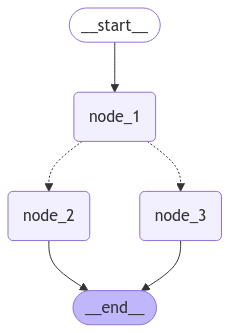


🚀 Passing Through [node_1] ..

#### [Input State]
  args: ({'name': 'changwoo'},)
  kwargs: {}

#### [Output State]
  result: {'name': 'changwoo is'}

🚀 Passing Through [decide_mood] ..

#### [Input State]
  args: ({'name': 'changwoo is'},)
  kwargs: {}

#### [Output State]
  result: node_3

🚀 Passing Through [node_3] ..

#### [Input State]
  args: ({'name': 'changwoo is'},)
  kwargs: {}

#### [Output State]
  result: {'name': 'changwoo is', 'mood': 'sad'}


{'name': 'changwoo is', 'mood': 'sad'}

In [2]:
class TypedDictState(TypedDict):
    name: str
    mood: Literal["happy","sad"]
    
@trace_function(enable_print=True)
def node_1(state):
    return {"name": state['name'] + " is"}

@trace_function(enable_print=True)
def node_2(state):
    state["mood"] = "happy"
    return state

@trace_function(enable_print=True)
def node_3(state):
    state["mood"] = "sad"
    return state

@trace_function(enable_print=True)
def decide_mood(state) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

builder = StateGraph(TypedDictState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"name":"changwoo"})

Pydantic Schema

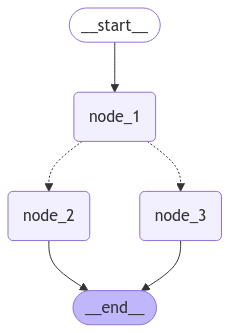


🚀 Passing Through [node_1] ..

#### [Input State]
  args: (PydanticState(name='changwoo', mood='sad'),)
  kwargs: {}

#### [Output State]
  result: {'name': 'changwoo is'}

🚀 Passing Through [decide_mood] ..

#### [Input State]
  args: (PydanticState(name='changwoo is', mood='sad'),)
  kwargs: {}

#### [Output State]
  result: node_3

🚀 Passing Through [node_3] ..

#### [Input State]
  args: (PydanticState(name='changwoo is', mood='sad'),)
  kwargs: {}

#### [Output State]
  result: name='changwoo is' mood='sad'


{'name': 'changwoo is', 'mood': 'sad'}

In [3]:
class PydanticState(BaseModel):
    name: str
    mood: str

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        if value not in ["happy", "sad"]:
            raise ValueError("Each mood must be either 'happy' or 'sad'")
        return value
    
@trace_function(enable_print=True)
def node_1(state):
    return {"name": state.name + " is"}

@trace_function(enable_print=True)
def node_2(state):
    state.mood = "happy"
    return state

@trace_function(enable_print=True)
def node_3(state):
    state.mood = "sad"
    return state

@trace_function(enable_print=True)
def decide_mood(state) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

builder = StateGraph(PydanticState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke(PydanticState(name="changwoo", mood="sad"))

Multiple Schema

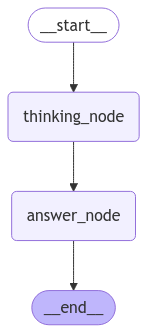


🚀 Passing Through [thinking_node] ..

#### [Input State]
  args: ({'question': 'How much is it?'},)
  kwargs: {}

#### [Output State]
  result: {'answer': '', 'notes': 'he will pay with credit card'}

🚀 Passing Through [answer_node] ..

#### [Input State]
  args: ({'question': 'How much is it?', 'answer': '', 'notes': 'he will pay with credit card'},)
  kwargs: {}

#### [Output State]
  result: {'answer': 'If you pay with credit card, it will be 2 dollars'}


{'answer': 'If you pay with credit card, it will be 2 dollars'}

In [4]:
class InputState(TypedDict):
    question: str # get only question key

class OutputState(TypedDict):
    answer: str # get only answer key

class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

@trace_function(enable_print=True)
def thinking_node(state: InputState):
    return {"answer": "", "notes": "he will pay with credit card"}

@trace_function(enable_print=True)
def answer_node(state: OverallState) -> OutputState:
    return {"answer": "If you pay with credit card, it will be 2 dollars"}

graph = StateGraph(OverallState, input=InputState, output=OutputState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)
graph = graph.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"question":"How much is it?","note":"he is changwoo"}) 